# Naive Bayes
* This is purely for classification algorithm (i.e A classification algorithm is a type of machine learning algorithm used to predict a category or class label for a given input.)
* This works on conditional probabilistic bases

Ex: wanted to go to movie but the condition is wether it rains or not

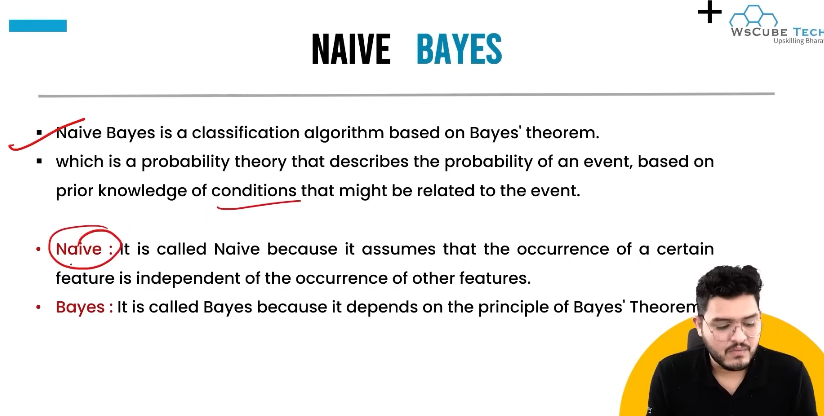

This Naive baise in depended o bayes theorem. For that we will first study som eprobability 

**Conditional Probability**

* Probability = Favarable outcome/ Total number of outcome
* 0<= P(E) <=1

* Type of Probability
  1) Independant : die rolled and the probability of each outcome in indepented to each other
  2) Dependant (conditional) : Say we have a bag and which contains 3R and 2B so the probability of blue ball given first red ball is already taken(without replacement) , so here the blue ball probability is depentent on red ball  
     Denoted by : P(B/R)  
     Formula : P(R n B) = P(B/R)/P(R)  
                   : P(B n R) = P(R/B)/P(B)
* From here only we derive Bayes theorem

**Bayes Theorem**
* That is we know that P(B u R) = P(R n B) = P(B/R)*P(R) = P(R/B)*P(B)
* Therefore combining both we get
* Bayes thoerm : P(B/R) = P(R/B)*P(B)/P(R)
* So this is on conditional probability

This formula indicates is, whenever an event A is occured then what is the probability of B  
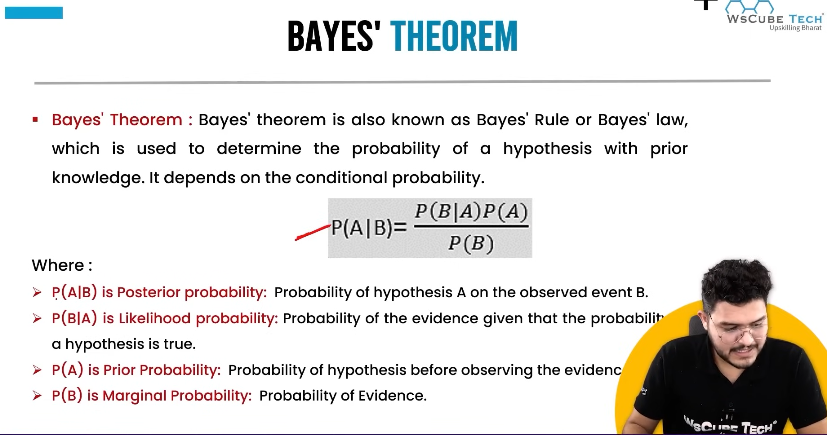

**Naive Bayes**
* Were
  * Naive : Features
  * Bayes : Bayes theorem

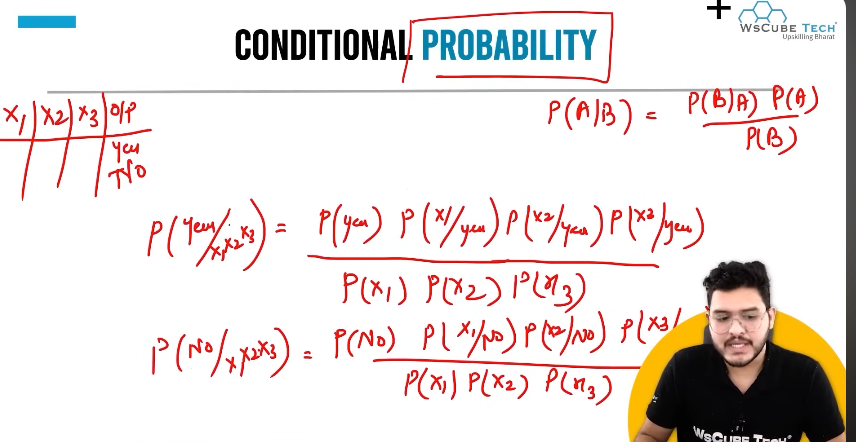

* Also see that both the denominator is same
* And Naive Bayes is comapring between outcomes
* So we can cut the denominator of both

* So from aboive both the probability is calculated then while giving the final result  
* Whichever probability is more that will be the answer  
* If P(Yes/x1x2x3) > P(No/x1x2x3) the result is Yes
* And vice verse

**Types of Naive Bayes**
1) Gaussian
2) Multinomial
3) Bernoulli  
   Now we will know which one to apply when

**Gaussian**
* Used when the input data nature is normal distribution
* 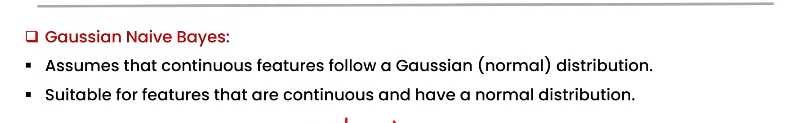

**Benoulli Naive Bayes**
* When the fetures are binary in nature (Because of Bernoulli curve)
* Mostly used after OneHotEncoding
* 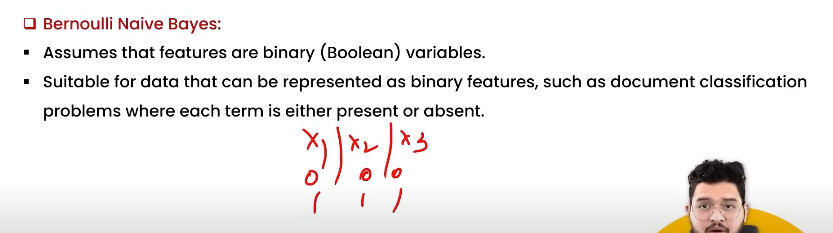

**Multinomial Naive Bayes**
* When features are of text
* Also used when the data is not following normal distribution
* 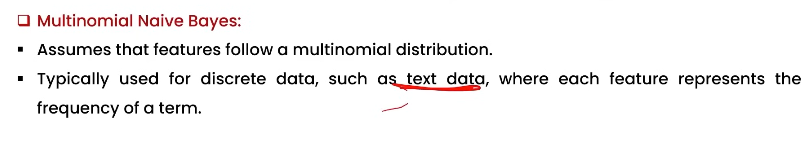 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv(r"D:\Data Science\Datasets\placement-dataset.csv")
data.drop(columns='Unnamed: 0', inplace=True)

In [12]:
data.head(3)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0


So now we can use CGPA and IQ and precict placesed or not

In [16]:
data.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

Check for relation through graph

<Axes: xlabel='cgpa', ylabel='iq'>

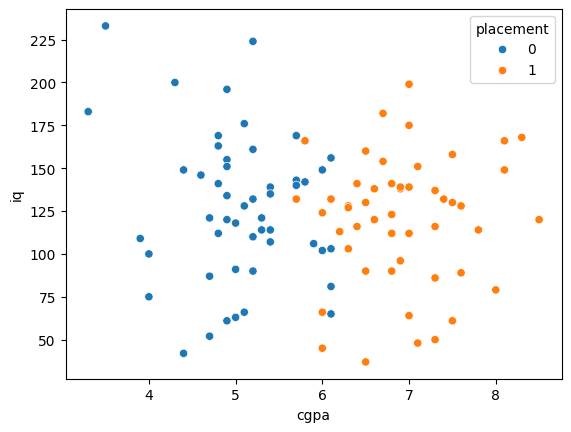

In [19]:
sns.scatterplot(x='cgpa', y='iq', data=data, hue='placement')

We can see here , we have almost linearly saparable data

In [21]:
x = data.iloc[:,:-1]
y = data['placement']

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

Now before training model, check how is data is ditributed

<Axes: xlabel='cgpa', ylabel='Density'>

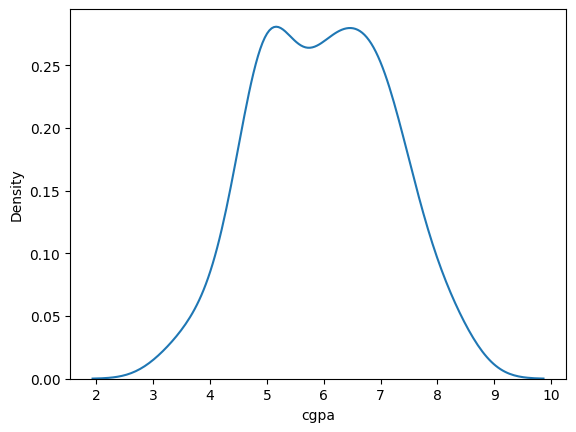

In [25]:
sns.kdeplot(x=data['cgpa'])

<Axes: xlabel='iq', ylabel='Density'>

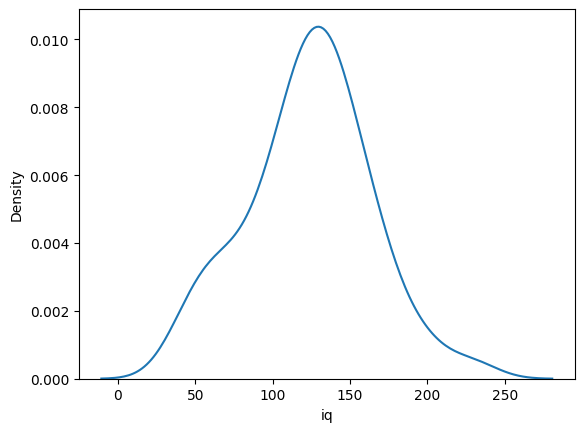

In [26]:
sns.kdeplot(x=data['iq'])

* Here we can see the data is almost Normal Distribution
* So we now if the data is normally distributed then we need to apply Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [32]:
gnb.score(x_test, y_test)

0.85

In [14]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<Axes: >

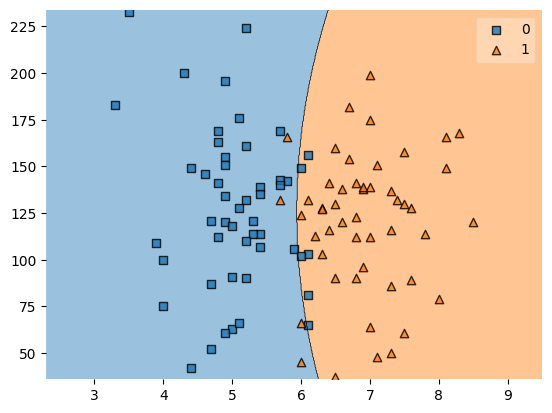

In [33]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=gnb)

In [42]:
gnb.predict([[6.17,200]])

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)